<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.027802,27.354725,236.031204,321.413731,173.256462,148.157269
1,0.0,1.0,51.481689,45.456425,-1726.175383,-1619.237268,120.998031,-1740.235299
2,0.0,2.0,56.171223,44.358325,-382.298093,-271.768545,138.211733,-409.980278
3,0.0,3.0,21.954529,40.768202,545.732441,618.455172,52.454779,566.000393
4,0.0,4.0,27.603475,78.106419,-3796.630718,-3680.920825,-59.567454,-3621.353371
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.686563,55.634811,-1024.821271,-873.499897,229.952630,-1103.452527
249996,999.0,246.0,54.304775,51.817653,-1126.437228,-1010.314799,35.091137,-1045.405936
249997,999.0,247.0,95.594189,46.358813,-1074.289007,-922.336005,409.189363,-1331.525369
249998,999.0,248.0,46.876454,80.830455,-5354.993837,-5217.286927,-347.033306,-4870.253621


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    48.027802  27.354725   236.031204   321.413731  173.256462   
      1.0    51.481689  45.456425 -1726.175383 -1619.237268  120.998031   
      2.0    56.171223  44.358325  -382.298093  -271.768545  138.211733   
      3.0    21.954529  40.768202   545.732441   618.455172   52.454779   
      4.0    27.603475  78.106419 -3796.630718 -3680.920825  -59.567454   
...                ...        ...          ...          ...         ...   
999.0 245.0  85.686563  55.634811 -1024.821271  -873.499897  229.952630   
      246.0  54.304775  51.817653 -1126.437228 -1010.314799   35.091137   
      247.0  95.594189  46.358813 -1074.289007  -922.336005  409.189363   
      248.0  46.876454  80.830455 -5354.993837 -5217.286927 -347.033306   
      249.0  24.753935  29.894343   873.054714   937.702993   57.455407   

                   e_hat  
rep   index               
0.0   0.0     148.157269  
      1.0   -1740.235299  
      2.0    -409.980278  
      3.0     566.000393  
      4.0   -3621.353371  
...                  ...  
999.0 245.0 -1103.452527  
      246.0 -1045.405936  
      247.0 -1331.525369  
      248.0 -4870.253621  
      249.0   880.247586  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    48.027802  27.354725   236.031204   321.413731  173.256462   
      1.0    51.481689  45.456425 -1726.175383 -1619.237268  120.998031   
      2.0    56.171223  44.358325  -382.298093  -271.768545  138.211733   
      3.0    21.954529  40.768202   545.732441   618.455172   52.454779   
      4.0    27.603475  78.106419 -3796.630718 -3680.920825  -59.567454   
...                ...        ...          ...          ...         ...   
999.0 245.0  85.686563  55.634811 -1024.821271  -873.499897  229.952630   
      246.0  54.304775  51.817653 -1126.437228 -1010.314799   35.091137   
      247.0  95.594189  46.358813 -1074.289007  -922.336005  409.189363   
      248.0  46.876454  80.830455 -5354.993837 -5217.286927 -347.033306   
      249.0  24.753935  29.894343   873.054714   937.702993   57.455407   

                   e_hat  
rep   index               
0.0   0.0     148.157269  
      1.0   -1740.235299  
      2.0    -409.980278  
      3.0     566.000393  
      4.0   -3621.353371  
...                  ...  
999.0 245.0 -1103.452527  
      246.0 -1045.405936  
      247.0 -1331.525369  
      248.0 -4870.253621  
      249.0   880.247586  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.027802,27.354725,236.031204,321.413731,173.256462,148.157269
1,0.0,1.0,51.481689,45.456425,-1726.175383,-1619.237268,120.998031,-1740.235299
2,0.0,2.0,56.171223,44.358325,-382.298093,-271.768545,138.211733,-409.980278
3,0.0,3.0,21.954529,40.768202,545.732441,618.455172,52.454779,566.000393
4,0.0,4.0,27.603475,78.106419,-3796.630718,-3680.920825,-59.567454,-3621.353371
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.686563,55.634811,-1024.821271,-873.499897,229.952630,-1103.452527
249996,999.0,246.0,54.304775,51.817653,-1126.437228,-1010.314799,35.091137,-1045.405936
249997,999.0,247.0,95.594189,46.358813,-1074.289007,-922.336005,409.189363,-1331.525369
249998,999.0,248.0,46.876454,80.830455,-5354.993837,-5217.286927,-347.033306,-4870.253621


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    48.027802  27.354725   236.031204   321.413731  173.256462   
      1.0    51.481689  45.456425 -1726.175383 -1619.237268  120.998031   
      2.0    56.171223  44.358325  -382.298093  -271.768545  138.211733   
      3.0    21.954529  40.768202   545.732441   618.455172   52.454779   
      4.0    27.603475  78.106419 -3796.630718 -3680.920825  -59.567454   
...                ...        ...          ...          ...         ...   
999.0 245.0  85.686563  55.634811 -1024.821271  -873.499897  229.952630   
      246.0  54.304775  51.817653 -1126.437228 -1010.314799   35.091137   
      247.0  95.594189  46.358813 -1074.289007  -922.336005  409.189363   
      248.0  46.876454  80.830455 -5354.993837 -5217.286927 -347.033306   
      249.0  24.753935  29.894343   873.054714   937.702993   57.455407   

                   e_hat  
rep   index               
0.0   0.0     148.157269  
      1.0   -1740.235299  
      2.0    -409.980278  
      3.0     566.000393  
      4.0   -3621.353371  
...                  ...  
999.0 245.0 -1103.452527  
      246.0 -1045.405936  
      247.0 -1331.525369  
      248.0 -4870.253621  
      249.0   880.247586  

[250000 rows x 6 columns]

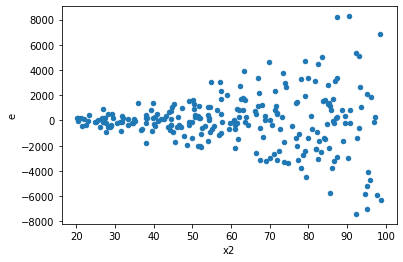

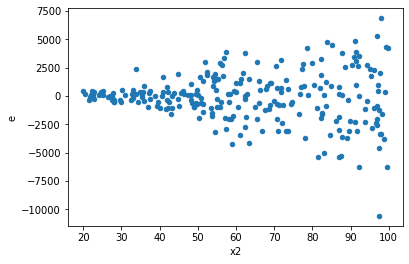

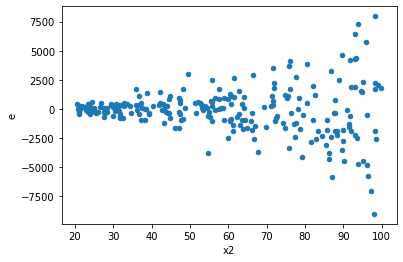

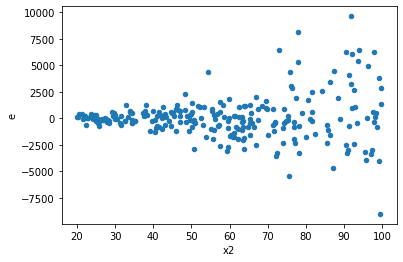

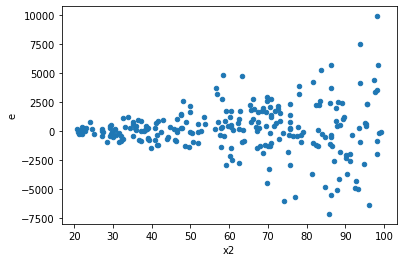

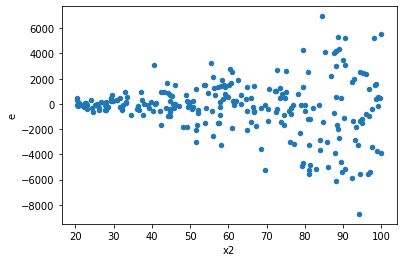

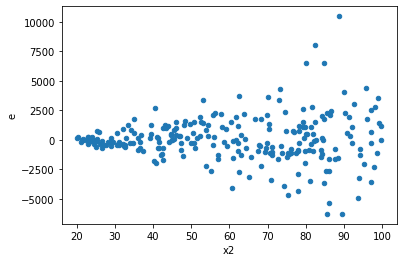

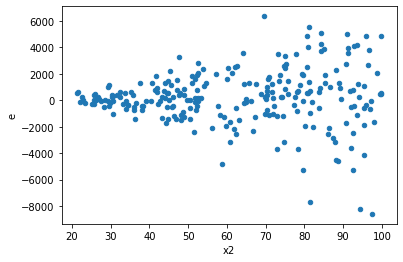

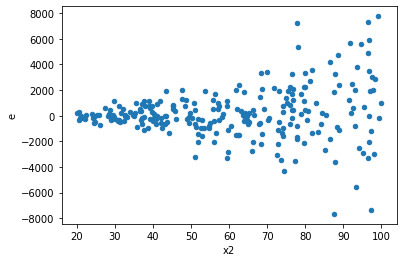

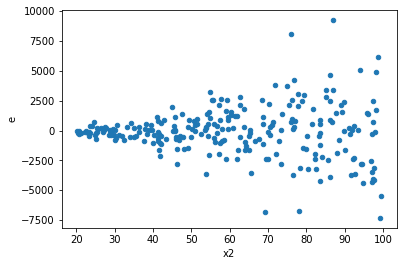

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,116.0,130.0,401267059.5516538,613970627.358185,3459198.7892383947,4722850.979678347,1.365301986798558,0.08445476283631392,0.957772618581843,0.04222738141815696,Reject001=1 : Homoscedasticity
4.0,121.0,125.0,429893454.8421403,703452434.4993134,3552838.469769755,5627619.475994507,1.5839784228521963,0.011148348799864705,0.9944258256000676,0.005574174399932352,Reject001=1 : Homoscedasticity
6.0,138.0,108.0,482622430.63975495,479190979.5546276,3497263.990143152,4436953.5143947,1.268692762942692,0.1963542382134449,0.9018228808932776,0.09817711910672244,Reject001=1 : Homoscedasticity
7.0,118.0,128.0,446090852.40553236,647651762.074404,3780430.952589257,5059779.391206281,1.3384133858444855,0.10641270495284649,0.9467936475235768,0.053206352476423247,Reject001=1 : Homoscedasticity
8.0,121.0,125.0,410780875.01238316,530564448.63170177,3394883.2645651503,4244515.589053614,1.2502684947540583,0.21632886987725297,0.8918355650613735,0.10816443493862649,Reject001=1 : Homoscedasticity
9.0,132.0,114.0,547492358.4699602,491049265.7021744,4147669.3823481835,4307449.6991418805,1.038522915416956,0.8382730906244493,0.5808634546877753,0.41913654531222466,Reject001=1 : Homoscedasticity
10.0,120.0,126.0,512530137.6400756,625545456.0304358,4271084.480333963,4964646.47643203,1.1623854548631722,0.4042452394667506,0.7978773802666247,0.2021226197333753,Reject001=1 : Homoscedasticity
12.0,119.0,127.0,471712990.01784754,508534759.2911281,3963974.706032332,4004210.703079749,1.0101504172027602,0.9538913010440186,0.5230543494779907,0.4769456505220093,Reject001=1 : Homoscedasticity
14.0,112.0,134.0,377923384.5969104,557045953.4289213,3374315.933900986,4157059.3539471743,1.2319709936411534,0.24694954482596332,0.8765252275870183,0.12347477241298166,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,120.0,126.0,585045057.6919773,574021880.2385414,4875375.480766477,4555729.208242392,0.934436583646716,0.7087389457995826,Reject001=1 : Homoscedasticity
1.0,118.0,128.0,610001046.3169613,560883816.3064159,5169500.392516621,4381904.814893874,0.8476457069695029,0.36282910291282516,Reject001=1 : Homoscedasticity
2.0,121.0,125.0,916361466.3234845,101337878.9311719,7573235.258871773,810703.0314493752,0.10704844148340245,1.3837727838648662e-29,Reject001=0 : Heteroscedasticity
3.0,116.0,130.0,401267059.5516538,613970627.358185,3459198.7892383947,4722850.979678347,1.365301986798558,0.08445476283631392,Reject001=1 : Homoscedasticity
4.0,121.0,125.0,429893454.8421403,703452434.4993134,3552838.469769755,5627619.475994507,1.5839784228521963,0.011148348799864705,Reject001=1 : Homoscedasticity
5.0,123.0,123.0,1064195321.9975035,135629057.10365987,8651994.487784581,1102675.2610053648,0.12744752236749454,3.6461454829773566e-26,Reject001=0 : Heteroscedasticity
6.0,138.0,108.0,482622430.63975495,479190979.5546276,3497263.990143152,4436953.5143947,1.268692762942692,0.1963542382134449,Reject001=1 : Homoscedasticity
7.0,118.0,128.0,446090852.40553236,647651762.074404,3780430.952589257,5059779.391206281,1.3384133858444855,0.10641270495284649,Reject001=1 : Homoscedasticity
8.0,121.0,125.0,410780875.01238316,530564448.63170177,3394883.2645651503,4244515.589053614,1.2502684947540583,0.21632886987725297,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    644
Reject001=1 : Homoscedasticity      356
Name: Result_test, dtype: int64